In [1]:
import random
import math
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap

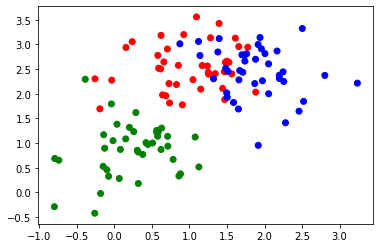

In [2]:
def generateData (numberOfClassEl, numberOfClasses):
    data = []
    for classNum in range(numberOfClasses):
        #Choose random center of 2-dimensional gaussian
        centerX, centerY = random.random()*5.0, random.random()*5.0
        #Choose numberOfClassEl random nodes with RMS=0.5
        for rowNum in range(numberOfClassEl):
            data.append([ [random.gauss(centerX,0.5), random.gauss(centerY,0.5)], classNum])
    return data


def showData (nClasses, nItemsInClass):
    trainData      = generateData (nItemsInClass, nClasses)
    classColormap  = ListedColormap(['red', 'blue', 'green'])
    pl.scatter([trainData[i][0][0] for i in range(len(trainData))],
               [trainData[i][0][1] for i in range(len(trainData))],
               c=[trainData[i][1] for i in range(len(trainData))],
               cmap=classColormap)
    pl.show()   
showData (3, 40)

In [3]:
#Separate N data elements in two parts:
#	test data with N*testPercent elements
#	train_data with N*(1.0 - testPercent) elements
def splitTrainTest (data, testPercent):
    trainData = []
    testData  = []
    for row in data:
        if random.random() < testPercent:
            testData.append(row)
        else:
            trainData.append(row)
    return trainData, testData	 

In [4]:
#Main classification procedure
def classifyKNN (trainData, testData, k, numberOfClasses):
    #Euclidean distance between 2-dimensional point
    def dist (a, b):
        return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)
    testLabels = []	
    for testPoint in testData:
        #Claculate distances between test point and all of the train points
        testDist = [ [dist(testPoint, trainData[i][0]), trainData[i][1]] for i in range(len(trainData))]
        #How many points of each class among nearest K
        stat = [0 for i in range(numberOfClasses)]
        for d in sorted(testDist)[0:k]:
            stat[d[1]] += 1
        #Assign a class with the most number of occurences among K nearest neighbours
        testLabels.append( sorted(zip(stat, range(numberOfClasses)), reverse=True)[0][1] )
    return testLabels

In [5]:
#Calculate classification accuracy
def calculateAccuracy (nClasses, nItemsInClass, k, testPercent):
    data = generateData (nItemsInClass, nClasses)
    trainData, testDataWithLabels = splitTrainTest (data, testPercent)
    testData = [testDataWithLabels[i][0] for i in range(len(testDataWithLabels))]
    testDataLabels = classifyKNN (trainData, testData, k, nClasses)
    print("Accuracy: ", sum([int(testDataLabels[i]==testDataWithLabels[i][1]) for i in range(len(testDataWithLabels))]) / float(len(testDataWithLabels)))
    

In [6]:
#Visualize classification regions
def showDataOnMesh (nClasses, nItemsInClass, k):
    #Generate a mesh of nodes that covers all train cases
    def generateTestMesh (trainData):
        x_min = min( [trainData[i][0][0] for i in range(len(trainData))] ) - 1.0
        x_max = max( [trainData[i][0][0] for i in range(len(trainData))] ) + 1.0
        y_min = min( [trainData[i][0][1] for i in range(len(trainData))] ) - 1.0
        y_max = max( [trainData[i][0][1] for i in range(len(trainData))] ) + 1.0
        h = 0.05
        testX, testY = np.meshgrid(np.arange(x_min, x_max, h),
                                   np.arange(y_min, y_max, h))
        return [testX, testY]
    trainData      = generateData (nItemsInClass, nClasses)
    testMesh       = generateTestMesh (trainData)	
    testMeshLabels = classifyKNN (trainData, zip(testMesh[0].ravel(), testMesh[1].ravel()), k, nClasses)
    classColormap  = ListedColormap(['#FF0000', '#00FF00', '#FFFFFF'])
    testColormap   = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAAA'])
    pl.pcolormesh(testMesh[0],
                  testMesh[1],
                  np.asarray(testMeshLabels).reshape(testMesh[0].shape),
                  cmap=testColormap)
    pl.scatter([trainData[i][0][0] for i in range(len(trainData))],
               [trainData[i][0][1] for i in range(len(trainData))],
               c=[trainData[i][1] for i in range(len(trainData))],
               cmap=classColormap)
    pl.show()

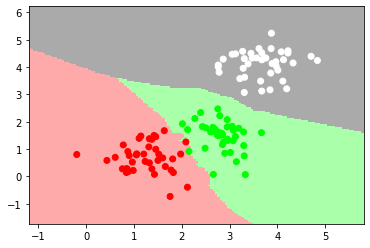

In [7]:
showDataOnMesh(3,40,3)

In [9]:
wheather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
wheather_encoded=le.fit_transform(wheather)
print("Wheather:", wheather_encoded)

# Converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)
print("Temp:    ",temp_encoded)
print("Play:    ",label)


#Combinig weather and temp into single listof tuples
features=list(zip(wheather_encoded,temp_encoded))
print("Features:", features)

Wheather: [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
Temp:     [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play:     [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
Features: [(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [ ]:
################################### KNN Classification for project

In [12]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn import preprocessing
import numpy
from sklearn.metrics import accuracy_score

#preprocessing
le = preprocessing.LabelEncoder()
bins=5

df= pd.read_csv("train.csv").applymap(lambda x: x.lower() if type(x) == str else x)
dftest=pd.read_csv("test.csv").applymap(lambda x: x.lower() if type(x) == str else x)
############################################################TRAIN#############################################################

#transform class to list and converting class into numbers
df['class']=le.fit_transform(df['class'])
train_label=df['class'].tolist()

dftest['class']=le.fit_transform(dftest['class'])
test_label=dftest['class'].tolist()

df.dropna(subset=['class']) #Drop the rows where class is missing.
dftest.dropna(subset=['class']) #Drop the rows where class is missing.

del df['class']
del dftest['class']

#converting string and bins into numbers
for col in df:    
    if type(df[col][0])==numpy.int64:  #numeric discretization
        df[col]=le.fit_transform(pd.qcut(df[col],int(bins),duplicates="drop"))              #Equal frequency func
        dftest[col]=le.fit_transform(pd.qcut(dftest[col],int(bins),duplicates="drop"))      #Equal frequency func  
        
        #df[col]=le.fit_transform(pd.cut(df[col],int(bins),duplicates="drop"))              #Equal width func
        #dftest[col]=le.fit_transform(pd.cut(dftest[col],int(bins),duplicates="drop"))      #Equal width func

    else:
        df[col]=le.fit_transform(df[col].tolist())
        dftest[col]=le.fit_transform(dftest[col].tolist())

##################################################KNN################################################################

#Create a KNN Classifier
model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(df,train_label) #train

#Predict Output
predicted=model.predict(dftest)

accuracy=accuracy_score(test_label, predicted)*100
print("Success percent is: %.2f%%" % accuracy)

Success percent is: 49.92%
